In [1]:
from scipy.io import loadmat
from casadi import *
import numpy as np
from casadi import SX, vertcat, nlpsol
from scipy.optimize import linprog

# import matrix functions
import importlib
import src.models.matrixForms
importlib.reload(src.models.matrixForms)
from src.models.matrixForms import *

# import solvers
import importlib
import src.algorithms.PrimalActiveSetQP_part2
importlib.reload(src.algorithms.PrimalActiveSetQP_part2)
from src.algorithms.PrimalActiveSetQP_part2 import *

# import solvers
import importlib
import src.algorithms.InteriorPointQP
importlib.reload(src.algorithms.InteriorPointQP)
from src.algorithms.InteriorPointQP import *

# import solvers
import importlib
import src.algorithms.QP_Examples
importlib.reload(src.algorithms.QP_Examples)
from src.algorithms.QP_Examples import *

In [2]:
data = loadmat('QP_Test.mat')

# 2.4

In [3]:
H_load = data['H'].squeeze().astype(float)
g_load = data['g'].squeeze().astype(float)
C_load = data['C'].squeeze().astype(float)
dl_load = data['dl'].squeeze().astype(float)
du_load = data['du'].squeeze().astype(float)
l_load = data['l'].squeeze().astype(float)
u_load = data['u'].squeeze().astype(float)

n = np.size(u_load)

# Define the decision variables
x = SX.sym("x",n)
f = 1/2*dot(x,H_load@x) + dot(g_load,x)
c = C_load.T@x

# Define the problem
nlp = {'x': x, 'f': f, 'g': c}

# Create the solver
solver = nlpsol('solver', 'ipopt', nlp)

# Solve the problem
r = solver(lbg=dl_load, ubg=du_load, lbx=l_load, ubx=u_load)
x_opt = r['x']
print('x_opt: ', x_opt)


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.11, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:      398
Number of nonzeros in Lagrangian Hessian.............:    20100

Total number of variables............................:      200
                     variables with only lower bounds:        0
                variables with lower and upper bounds:      200
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality c

# 2.6

In [9]:
A_bar, b_bar = LPStandardForm( C_load, dl_load, C_load, du_load, l_load, u_load)
x_bar = feasibleInitialPoint(A_bar, b_bar)
x0 = x_bar[n:2*n] - x_bar[:n]

In [10]:
A = np.vstack([C_load.T, -C_load.T, np.eye(n), -np.eye(n)]).T
b = np.hstack([dl_load, -du_load, l_load, -u_load])
MaxIter = 1000
tol = 1e-6
g = g_load.squeeze()
m = A.shape[1]


In [11]:
res = PrimalActiveSetQP(H_load, g, A, b, x0, tol, MaxIter)

x_opt = res['x_min']
# save x_opt as mat file
from scipy.io import savemat
savemat('x_opt.mat', {'x_opt': x_opt})

In [12]:
res

{'converged': True,
 'x_min': array([ 100.        ,   87.08437204,  100.        ,   87.2140603 ,
         100.        ,   87.414169  ,  100.        ,   87.6920374 ,
         100.        ,   88.05341694,  100.        ,   88.50226034,
         100.        ,   89.04041035,  100.        ,   89.66718246,
         100.        ,   90.37883858,  100.        ,   91.16795132,
         100.        ,   92.02266212,  100.        ,   92.92584102,
         100.        ,   93.85416099,  100.        ,   94.77710648,
         100.        ,   95.65594358,  100.        ,   96.44268848,
         100.        ,   97.07912141,  100.        ,   97.4959058 ,
         100.        ,   97.61188597,  100.        ,   97.33365201,
         100.        ,   96.55547705,   99.29572188,   95.15974975,
          96.90044841,   93.01804303,   92.68218382,   89.99298537,
          86.50849141,   85.94113071,   78.25101131,   80.71703952,
          67.79180808,   74.17878627,   55.03164108,   66.19510724,
          39.900234

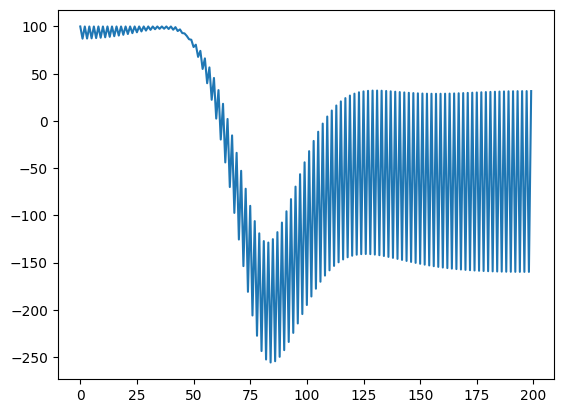

In [13]:
# plot x_opt
import matplotlib.pyplot as plt
plt.plot(x_opt)
plt.show()

# 2.8

In [17]:
# import solvers
import importlib
import src.algorithms.InteriorPointQP
importlib.reload(src.algorithms.InteriorPointQP)
from src.algorithms.InteriorPointQP import *


# Inequality constraints
d = np.hstack([dl_load, -du_load, l_load, -u_load]).squeeze()
C = np.vstack([C_load.T, -C_load.T, np.eye(n), -np.eye(n)]).T
A = np.zeros([200,0])
b = np.array([])
y = np.array([])
s = np.ones(len(d))         # slack variables
z = np.ones(len(d))          # inequality lagrange multiplier

def f(x1,x2):
    x = np.array([x1,x2])
    return 0.5 * x.T @ H_load @ x + g.T @ x


MaxIter = 1000
tol = 10**(-2)

#%% Interior-Point Algoritm
x0 = np.linalg.solve(H_load, -g)
res = InteriorPointQP(H_load,g,A,b,C,d,x0,y,z,s,MaxIter,tol)
X = res['x_array']
x0 = X[0,:]
xmin = res['xmin']

#plotQP(H,g,C,d,X, xlimits = [0, 100, 0, 100])

<Figure size 640x480 with 0 Axes>

In [18]:
res

{'xmin': array([ 1.00317209e+02,  8.63984650e+01,  1.00712236e+02,  8.59278773e+01,
         1.01200069e+02,  8.56054761e+01,  1.01791786e+02,  8.54305024e+01,
         1.02494401e+02,  8.54008061e+01,  1.03310570e+02,  8.55129574e+01,
         1.04238161e+02,  8.57621630e+01,  1.05269676e+02,  8.61419924e+01,
         1.06391541e+02,  8.66439223e+01,  1.07583273e+02,  8.72567099e+01,
         1.08816538e+02,  8.79656068e+01,  1.10054130e+02,  8.87514318e+01,
         1.11248896e+02,  8.95895229e+01,  1.12342653e+02,  9.04485983e+01,
         1.13265143e+02,  9.12895609e+01,  1.13933092e+02,  9.20642920e+01,
         1.14249442e+02,  9.27144906e+01,  1.14102831e+02,  9.31706259e+01,
         1.13367442e+02,  9.33510872e+01,  1.11903301e+02,  9.31616270e+01,
         1.09557164e+02,  9.24952140e+01,  1.06164128e+02,  9.12324266e+01,
         1.01550091e+02,  8.92425359e+01,  9.55352360e+01,  8.63854441e+01,
         8.79386784e+01,  8.25146592e+01,  7.85844427e+01,  7.74814985e+01,
    

In [43]:
#save x_opt as mat file
from scipy.io import savemat
savemat('x_opt2.mat', {'x_opt': xmin})
